# Explorando dados com Pandas

In [50]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
# Ideal o csv estar em um local que todos consigam acessá-lo, pois facilita no momento de cada um utilizar na sua máquina

df.head(10)
#ideal para entender como os dados estão organizados na tabela

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [51]:
df.describe()
#estatisticas das colunas numéricas (float e int)

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [52]:
df.shape
#número de linhas e colunas

(133349, 11)

# Deixando o shape mais elegante

Bom para relatórios, por exemplo

In [53]:
linhas, colunas = df.shape[0], df.shape[1]

print(f"O dataframe possui {linhas} linhas e {colunas} colunas")

O dataframe possui 133349 linhas e 11 colunas


In [54]:
df.columns
#titulo das colunas do arquivo

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [55]:
#frequencia para as colunas com variaveis categóricas

df["experience_level"].value_counts()

,count
experience_level,
SE,77241
MI,40465
EN,12443
EX,3200


# Traduzindo colunas e linhas para o português + evitando siglas


In [56]:
#Traduzindo todas colunas (rename)

mapeamento_colunas = {
    'work_year': 'ano',
    'experience_level': 'senoridade',
    'employment_type': 'periodo',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_dolar_americano',
    'employee_residence': 'residencia',
    'remote_ratio': 'percentual_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=mapeamento_colunas)
print("Colunas traduzidas com sucesso! Novas colunas:")
print(df.columns)

Colunas traduzidas com sucesso! Novas colunas:
Index(['ano', 'senoridade', 'periodo', 'cargo', 'salario', 'moeda_salario',
       'salario_em_dolar_americano', 'residencia', 'percentual_remoto',
       'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')


In [57]:
#Estatisticas das variaveis categóricas
df.describe(include="object")

,senoridade,periodo,cargo,moeda_salario,residencia,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


In [58]:
df['senoridade'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [59]:
substituir_senoridade = {
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senoridade'] = df['senoridade'].replace(substituir_senoridade)

In [60]:
df['periodo'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [61]:
substituir_periodo = {
    'FT': 'Horário integral',
    'PT': 'Meio período',
    'FL': 'FreeLancer',
    'CT': 'Contrato'
}

df['periodo'] = df['periodo'].map(substituir_periodo)

In [62]:
df['cargo'].unique()

array(['Solutions Engineer', 'Data Engineer', 'Data Scientist',
       'BI Developer', 'Data Analyst', 'Applied Scientist',
       'Systems Engineer', 'Director', 'Associate', 'Software Engineer',
       'Consultant', 'Analyst', 'Product Manager', 'Software Developer',
       'Engineer', 'Developer', 'Data Specialist', 'Manager',
       'Research Scientist', 'Software Architect',
       'Data Management Analyst', 'Data Reporter',
       'Computational Biologist', 'Product Designer',
       'Software Development Engineer', 'Architect',
       'Data Analytics Manager', 'Principal Statistical Programmer',
       'Cloud Engineer', 'Data Architect', 'Product Owner', 'Executive',
       'Business Intelligence Engineer', 'Data Governance Lead',
       'Data Governance Specialist', 'AI Engineer', 'Solutions Architect',
       'AI Researcher', 'Machine Learning Engineer', 'Bear Robotics',
       'Data Strategist', 'Research Engineer', 'Researcher',
       'Business Analyst', 'Solution Engineer'

In [63]:
substituir_cargo = {
    'Solutions Engineer': 'Engenheiro de Soluções',
    'Data Engineer': 'Engenheiro de Dados',
    'Data Scientist': 'Cientista de Dados',
    'BI Developer': 'Desenvolvedor BI',
    'Data Analyst': 'Analista de Dados',
    'Applied Scientist': 'Cientista Aplicado',
    'Systems Engineer': 'Engenheiro de Sistemas',
    'Director': 'Diretor',
    'Associate': 'Associado',
    'Software Engineer': 'Engenheiro de Software',
    'Consultant': 'Consultor',
    'Analyst': 'Analista',
    'Product Manager': 'Gerente de Produto',
    'Software Developer': 'Desenvolvedor de Software',
    'Engineer': 'Engenheiro',
    'Developer': 'Desenvolvedor',
    'Data Specialist': 'Especialista em Dados',
    'Manager': 'Gerente',
    'Research Scientist': 'Cientista de Pesquisa',
    'Software Architect': 'Arquiteto de Software',
    'Data Management Analyst': 'Analista de Gestão de Dados',
    'Data Reporter': 'Repórter de Dados',
    'Computational Biologist': 'Biólogo Computacional',
    'Product Designer': 'Designer de Produto',
    'Software Development Engineer': 'Engenheiro de Desenvolvimento de Software',
    'Architect': 'Arquiteto',
    'Data Analytics Manager': 'Gerente de Análise de Dados',
    'Principal Statistical Programmer': 'Programador Estatístico Principal',
    'Cloud Engineer': 'Engenheiro de Cloud',
    'Data Architect': 'Arquiteto de Dados',
    'Product Owner': 'Dono do Produto',
    'Executive': 'Executivo',
    'Business Intelligence Engineer': 'Engenheiro de Business Intelligence',
    'Data Governance Lead': 'Líder de Governança de Dados',
    'Data Governance Specialist': 'Especialista em Governança de Dados',
    'AI Engineer': 'Engenheiro de IA',
    'Solutions Architect': 'Arquiteto de Soluções',
    'AI Researcher': 'Pesquisador de IA',
    'Machine Learning Engineer': 'Engenheiro de Aprendizado de Máquina',
    'Bear Robotics': 'Bear Robotics',  # (nome próprio)
    'Data Strategist': 'Estrategista de Dados',
    'Research Engineer': 'Engenheiro de Pesquisa',
    'Researcher': 'Pesquisador',
    'Business Analyst': 'Analista de Negócios',
    'Solution Engineer': 'Engenheiro de Soluções',
    'Full Stack Developer': 'Desenvolvedor Full Stack',
    'Product Analyst': 'Analista de Produto',
    'Full Stack Engineer': 'Engenheiro Full Stack',
    'Backend Engineer': 'Engenheiro Backend',
    'Sales Engineer': 'Engenheiro de Vendas',
    'Prompt Engineer': 'Engenheiro de Prompt',
    'Head of AI': 'Chefe de IA',
    'Platform Engineer': 'Engenheiro de Plataforma',
    'Analytics Engineer': 'Engenheiro de Análise',
    'Engineering Manager': 'Gerente de Engenharia',
    'BI Engineer': 'Engenheiro BI',
    'Systems Administrator': 'Administrador de Sistemas',
    'Data Platform Engineer': 'Engenheiro de Plataforma de Dados',
    'Site Reliability Engineer': 'Engenheiro de Confiabilidade de Site',
    'Computer Vision Engineer': 'Engenheiro de Visão Computacional',
    'Data Operations Analyst': 'Analista de Operações de Dados',
    'MLOps Engineer': 'Engenheiro MLOps',
    'Solution Architect': 'Arquiteto de Soluções',
    'Data Product Owner': 'Dono do Produto de Dados',
    'Data Analytics Specialist': 'Especialista em Análise de Dados',
    'Artificial Intelligence Engineer': 'Engenheiro de Inteligência Artificial',
    'ML Scientist': 'Cientista de Aprendizado de Máquina',
    'Data Governance Manager': 'Gerente de Governança de Dados',
    'Data Manager': 'Gerente de Dados',
    'Machine Learning Scientist': 'Cientista de Aprendizado de Máquina',
    'Data Management': 'Gestão de Dados',
    'Data Lead': 'Líder de Dados',
    'System Engineer': 'Engenheiro de Sistema',
    'Research Assistant': 'Assistente de Pesquisa',
    'Statistical Programmer': 'Programador Estatístico',
    'Data Analysis': 'Análise de Dados',
    'Data Quality Lead': 'Líder de Qualidade de Dados',
    'Tech Lead': 'Líder Técnico',
    'Head of Data': 'Chefe de Dados',
    'Data Quality Analyst': 'Analista de Qualidade de Dados',
    'Quantitative Analyst': 'Analista Quantitativo',
    'AI Developer': 'Desenvolvedor de IA',
    'Business Intelligence Specialist': 'Especialista em Business Intelligence',
    'Business Intelligence Analyst': 'Analista de Business Intelligence',
    'Data Modeler': 'Modelador de Dados',
    'Analytics Lead': 'Líder de Análise',
    'Business Intelligence Developer': 'Desenvolvedor de Business Intelligence',
    'Creative Technologist': 'Tecnólogo Criativo',
    'Member of Technical Staff': 'Membro da Equipe Técnica',
    'Quantitative Researcher': 'Pesquisador Quantitativo',
    'Data Integration Engineer': 'Engenheiro de Integração de Dados',
    'Data Management Specialist': 'Especialista em Gestão de Dados',
    'Postdoctoral Fellow': 'Pós-Doutor',
    'Power BI Developer': 'Desenvolvedor Power BI',
    'Data Product Manager': 'Gerente de Produto de Dados',
    'Technical Architect': 'Arquiteto Técnico',
    'Data Governance': 'Governança de Dados',
    'Actuary': 'Atuário',
    'Big Data Developer': 'Desenvolvedor Big Data',
    'Lead Engineer': 'Engenheiro Líder',
    'Technical Lead': 'Líder Técnico',
    'Encounter Data Management Professional': 'Profissional de Gestão de Dados de Encontros',
    'Data and Reporting Professional': 'Profissional de Dados e Relatórios',
    'Cloud Database Engineer': 'Engenheiro de Banco de Dados em Cloud',
    'Tableau Developer': 'Desenvolvedor Tableau',
    'Bioinformatics Specialist': 'Especialista em Bioinformática',
    'Business Intelligence': 'Business Intelligence',
    'Research Associate': 'Associado de Pesquisa',
    'Data Analytics Lead': 'Líder de Análise de Dados',
    'AI Specialist': 'Especialista em IA',
    'Data Visualization Specialist': 'Especialista em Visualização de Dados',
    'Computational Scientist': 'Cientista Computacional',
    'Data Developer': 'Desenvolvedor de Dados',
    'Data Governance Analyst': 'Analista de Governança de Dados',
    'DevOps Engineer': 'Engenheiro DevOps',
    'Data Governance Engineer': 'Engenheiro de Governança de Dados',
    'AI Architect': 'Arquiteto de IA',
    'Data Operations': 'Operações de Dados',
    'Data Integrity Specialist': 'Especialista em Integridade de Dados',
    'Postdoctoral Researcher': 'Pesquisador Pós-Doutor',
    'Statistician': 'Estatístico',
    'Principal Researcher': 'Pesquisador Principal',
    'QA Engineer': 'Engenheiro de QA',
    'Data Operations Lead': 'Líder de Operações de Dados',
    'Quantitative Developer': 'Desenvolvedor Quantitativo',
    'Account Executive': 'Executivo de Contas',
    'AI Scientist': 'Cientista de IA',
    'Data Management Lead': 'Líder de Gestão de Dados',
    'Machine Learning Specialist': 'Especialista em Aprendizado de Máquina',
    'AI Content Writer': 'Redator de Conteúdo de IA',
    'Psychometrician': 'Psicometrista',
    'Director of Product Management': 'Diretor de Gestão de Produto',
    'Python Developer': 'Desenvolvedor Python',
    'Product Specialist': 'Especialista de Produto',
    'Automation Engineer': 'Engenheiro de Automação',
    'Decision Scientist': 'Cientista de Decisão',
    'AI Governance Specialist': 'Especialista em Governança de IA',
    'Data Steward': 'Administrador de Dados',
    'Sales Development Representative': 'Representante de Desenvolvimento de Vendas',
    'Machine Learning Researcher': 'Pesquisador de Aprendizado de Máquina',
    'AI Research Scientist': 'Cientista de Pesquisa em IA',
    'Insight Analyst': 'Analista de Insights',
    'Data Quality Engineer': 'Engenheiro de Qualidade de Dados',
    'Data & Analytics Analyst': 'Analista de Dados e Análise',
    'Technical Specialist': 'Especialista Técnico',
    'Postdoctoral Research Fellow': 'Bolsista de Pesquisa Pós-Doutorado',
    'Power BI': 'Power BI',  # (nome próprio)
    'Director of Machine Learning': 'Diretor de Aprendizado de Máquina',
    'Bioinformatician': 'Bioinformata',
    'Principal Scientist': 'Cientista Principal',
    'AI Data Scientist': 'Cientista de Dados de IA',
    'Research Professional': 'Profissional de Pesquisa',
    'Power BI Administrator': 'Administrador Power BI',
    'Data Consultant': 'Consultor de Dados',
    'Research Analyst': 'Analista de Pesquisa',
    'ETL Developer': 'Desenvolvedor ETL',
    'Analytics Specialist': 'Especialista em Análise',
    'Economist': 'Economista',
    'Cheminformatics Scientist': 'Cientista de Quimioinformática',
    'Algorithm Developer': 'Desenvolvedor de Algoritmos',
    'Data Team Lead': 'Líder da Equipe de Dados',
    'Data Analist': 'Analista de Dados',  # (nota: provável erro ortográfico no original)
    'Technical Recruiter': 'Recrutador Técnico',
    'Data Governance Consultant': 'Consultor de Governança de Dados',
    'Web Developer': 'Desenvolvedor Web',
    'Data Visualization Engineer': 'Engenheiro de Visualização de Dados',
    'Head of Marketing': 'Chefe de Marketing',
    'Technical Support Specialist': 'Especialista em Suporte Técnico',
    'Post Doctoral Fellow': 'Pós-Doutor',
    'Security Researcher': 'Pesquisador de Segurança',
    'AI Lead': 'Líder de IA',
    'Cientista de Dados': 'Cientista de Dados',  # (já está em português)
    'AI Tech Lead': 'Líder Técnico de IA',
    'Bioinformatics Scientist': 'Cientista de Bioinformática',
    'Clinical Aide': 'Auxiliar Clínico',
    'System Administrator': 'Administrador de Sistema',
    'Data Operations Engineer': 'Engenheiro de Operações de Dados',
    'Data Infrastructure Engineer': 'Engenheiro de Infraestrutura de Dados',
    'AI Strategist': 'Estrategista de IA',
    'DataOps Engineer': 'Engenheiro DataOps',
    'Application Developer': 'Desenvolvedor de Aplicativos',
    'AI Product Lead': 'Líder de Produto de IA',
    'AI Solutions Specialist': 'Especialista em Soluções de IA',
    'Enterprise Account Executive': 'Executivo de Contas Corporativas',
    'Software Development Director': 'Diretor de Desenvolvimento de Software',
    'BI Analyst': 'Analista BI',
    'Advanced Data Analyst': 'Analista de Dados Avançado',
    'Head of Machine Learning': 'Chefe de Aprendizado de Máquina',
    'Cloud Database Administrator': 'Administrador de Banco de Dados em Cloud',
    'AI Engineering Lead': 'Líder de Engenharia de IA',
    'Data Reporting Specialist': 'Especialista em Relatórios de Dados',
    'Quant Trader': 'Trader Quantitativo',
    'Data Strategy Lead': 'Líder de Estratégia de Dados',
    'Copywriter': 'Redator',
    'Integration Specialist': 'Especialista em Integração',
    'Database Administrator': 'Administrador de Banco de Dados',
    'Backend Developer': 'Desenvolvedor Backend',
    'Business Development Representative': 'Representante de Desenvolvimento de Negócios',
    'Technical Writer': 'Redator Técnico',
    'AI Product Owner': 'Dono do Produto de IA',
    'Technical Support Engineer': 'Engenheiro de Suporte Técnico',
    'Trainee': 'Estagiário',
    'Head of Applied AI': 'Chefe de IA Aplicada',
    'Machine Learning Architect': 'Arquiteto de Aprendizado de Máquina',
    'Java Developer': 'Desenvolvedor Java',
    'Principal Engineer': 'Engenheiro Principal',
    'Business Intelligence Lead': 'Líder de Business Intelligence',
    'Data Visualization Developer': 'Desenvolvedor de Visualização de Dados',
    'Data Integration Specialist': 'Especialista em Integração de Dados',
    'Data Management Associate': 'Associado de Gestão de Dados',
    'Power BI Expert': 'Especialista Power BI',
    'Marketing Science Partner': 'Parceiro de Ciência de Marketing',
    'Data Operations Specialist': 'Especialista em Operações de Dados',
    'Salesforce Administrator': 'Administrador Salesforce',
    'Chatbot Developer': 'Desenvolvedor de Chatbot',
    'Cloud Developer': 'Desenvolvedor Cloud',
    'Data Analytics Business Partner': 'Parceiro de Negócios de Análise de Dados',
    'Data Quality Expert': 'Especialista em Qualidade de Dados',
    'Data Integrator': 'Integrador de Dados',
    'Data Operator': 'Operador de Dados',
    'BI & Data Analyst': 'Analista BI e Dados',
    'Network Engineer': 'Engenheiro de Redes',
    'Risk Analyst': 'Analista de Risco',
    'Data Integration Lead': 'Líder de Integração de Dados',
    'DevOps Lead': 'Líder DevOps',
    'Data Product Lead': 'Líder de Produto de Dados',
    'Cloud Architect': 'Arquiteto Cloud',
    'Data Scientist Manager': 'Gerente de Cientista de Dados',
    'Robotics Engineer': 'Engenheiro de Robótica',
    'Power BI Specialist': 'Especialista Power BI',
    'Data Management Consultant': 'Consultor de Gestão de Dados',
    'Stage': 'Estágio',  # (contexto profissional)
    'Data and Analytics Consultant': 'Consultor de Dados e Análise',
    'Alternance': 'Alternância',  # (contexto educacional/profissional)
    'Big Data Engineer': 'Engenheiro Big Data',
    'LLM Engineer': 'Engenheiro LLM',
    'Quantitative Trader': 'Trader Quantitativo',
    'Machine Learning Lead': 'Líder de Aprendizado de Máquina',
    'Data Integration Developer': 'Desenvolvedor de Integração de Dados',
    'Data Operations Manager': 'Gerente de Operações de Dados',
    'Data Archivist': 'Arquivista de Dados',
    'Developer Advocate': 'Defensor do Desenvolvedor',
    'RPA Developer': 'Desenvolvedor RPA',
    'Research Team Lead': 'Líder da Equipe de Pesquisa',
    'Data Analytics Developer': 'Desenvolvedor de Análise de Dados',
    'Quant Options Trader': 'Trader de Opções Quantitativo',
    'Data Management Expert': 'Especialista em Gestão de Dados',
    'Conversational AI Designer': 'Designer de IA Conversacional',
    'Scala Spark Developer': 'Desenvolvedor Scala Spark',
    'Business Intelligence Manager': 'Gerente de Business Intelligence',
    'Data Scientist Expert': 'Especialista em Ciência de Dados',
    'Customer Success Engineer': 'Engenheiro de Sucesso do Cliente',
    'Data Visualization Designer': 'Designer de Visualização de Dados',
    'Experienced Quantitative Strategist': 'Estrategista Quantitativo Experiente',
    'Tech Lead Data': 'Líder Técnico de Dados',
    'Data and Reporting Analyst': 'Analista de Dados e Relatórios',
    'AI Programmer': 'Programador de IA',
    'Data Analysis Specialist': 'Especialista em Análise de Dados',
    'GenAI Architect': 'Arquiteto GenAI',
    'Machine Learning Developer': 'Desenvolvedor de Aprendizado de Máquina',
    'Data Reporting Analyst': 'Analista de Relatórios de Dados',
    'Data Integrity Analyst': 'Analista de Integridade de Dados',
    'Data Visualization Analyst': 'Analista de Visualização de Dados',
    'Lead Data Analysis': 'Líder de Análise de Dados',
    'Data Visualization Expert': 'Especialista em Visualização de Dados',
    'Customer Success Manager': 'Gerente de Sucesso do Cliente',
    'Actuarial Analyst': 'Analista Atuarial',
    'AI Governance Lead': 'Líder de Governança de IA',
    'Data Quality Specialist': 'Especialista em Qualidade de Dados',
    'AI Data Engineer': 'Engenheiro de Dados de IA',
    'Technology Integrator': 'Integrador de Tecnologia',
    'Principal Software Architect': 'Arquiteto de Software Principal',
    'Master Data Management': 'Gestão de Dados Mestre',
    'Staff Data Scientist': 'Cientista de Dados Sênior',
    'AI Machine Learning Engineer': 'Engenheiro de IA e Aprendizado de Máquina',
    'Lead Analyst': 'Analista Líder',
    'Data Analytics Consultant': 'Consultor de Análise de Dados',
    'Data Scientist Associate': 'Associado de Ciência de Dados',
    'Clinical Data Operator': 'Operador de Dados Clínicos',
    'Research Data Manager': 'Gerente de Dados de Pesquisa',
    'Applied Research Scientist': 'Cientista de Pesquisa Aplicada',
    'Lead Data Management': 'Líder de Gestão de Dados',
    'Data Integration Analyst': 'Analista de Integração de Dados',
    'Safety Data Management Specialist': 'Especialista em Gestão de Dados de Segurança',
    'Big Data Analyst': 'Analista Big Data',
    'Pricing Analyst': 'Analista de Preços',
    'Lead Data Engineer': 'Engenheiro de Dados Líder',
    'AI Engineering Manager': 'Gerente de Engenharia de IA',
    'Data Management Coordinator': 'Coordenador de Gestão de Dados',
    'Analytics Analyst': 'Analista de Análise',
    'Controls Engineer': 'Engenheiro de Controle',
    'Machine Learning Tech Lead': 'Líder Técnico de Aprendizado de Máquina',
    'Business Development Manager': 'Gerente de Desenvolvimento de Negócios',
    'Business Insights Manager': 'Gerente de Insights de Negócios',
    'Platform Data Engineer': 'Engenheiro de Dados de Plataforma',
    'Principal Application Delivery Consultant': 'Consultor Principal de Entrega de Aplicações',
    'Data Governance Architect': 'Arquiteto de Governança de Dados',
    'Power BI Consultant': 'Consultor Power BI',
    'Backend Software Engineer': 'Engenheiro de Software Backend',
    'AI Product Manager': 'Gerente de Produto de IA',
    'Data Operations Associate': 'Associado de Operações de Dados',
    'ML Infrastructure Engineer': 'Engenheiro de Infraestrutura de ML',
    'Fullstack Engineer': 'Engenheiro Fullstack',
    'Machine Learning Quality Engineer': 'Engenheiro de Qualidade de Aprendizado de Máquina',
    'Security Engineer': 'Engenheiro de Segurança',
    'Databricks Engineer': 'Engenheiro Databricks',
    'Infrastructure Engineer': 'Engenheiro de Infraestrutura',
    'Machine Learning Performance Engineer': 'Engenheiro de Performance de Aprendizado de Máquina',
    'Data Analytics Associate': 'Associado de Análise de Dados',
    'Power BI Architect': 'Arquiteto Power BI',
    'Machine Learning Platform Engineer': 'Engenheiro de Plataforma de Aprendizado de Máquina',
    'AI Solution Architect': 'Arquiteto de Solução de IA',
    'Data Scientist Lead': 'Líder de Cientista de Dados',
    'Machine Vision Engineer': 'Engenheiro de Visão de Máquina',
    'Machine Learning Model Engineer': 'Engenheiro de Modelos de Aprendizado de Máquina',
    'Marketing Analyst': 'Analista de Marketing',
    'Data Management Manager': 'Gerente de Gestão de Dados',
    'Marketing Analytics Manager': 'Gerente de Análise de Marketing',
    'Applied AI ML Lead': 'Líder de IA e Aprendizado de Máquina Aplicados',
    'Data Strategy Manager': 'Gerente de Estratégia de Dados',
    'Machine Learning Manager': 'Gerente de Aprendizado de Máquina',
    'Data Product Analyst': 'Analista de Produto de Dados',
    'Data Quality Manager': 'Gerente de Qualidade de Dados',
    'Elasticsearch Administrator': 'Administrador Elasticsearch',
    'Machine Learning Infrastructure Engineer': 'Engenheiro de Infraestrutura de Aprendizado de Máquina',
    'People Data Analyst': 'Analista de Dados de Pessoas',
    'Frontend Engineer': 'Engenheiro Frontend',
    'NLP Engineer': 'Engenheiro de PLN',
    'SAS Developer': 'Desenvolvedor SAS',
    'Data Analytics Team Lead': 'Líder da Equipe de Análise de Dados',
    'Machine Learning Modeler': 'Modelador de Aprendizado de Máquina',
    'Data Integration Coordinator': 'Coordenador de Integração de Dados',
    'Admin & Data Analyst': 'Administrador e Analista de Dados',
    'Head of Business Intelligence': 'Chefe de Business Intelligence',
    'ETL Engineer': 'Engenheiro ETL',
    'AI Research Engineer': 'Engenheiro de Pesquisa em IA',
    'Business Intelligence Consultant': 'Consultor de Business Intelligence',
    'Robotics Software Engineer': 'Engenheiro de Software de Robótica',
    'AI Software Engineer': 'Engenheiro de Software de IA',
    'Lead AI Engineer': 'Engenheiro Líder de IA',
    'AI Software Development Engineer': 'Engenheiro de Desenvolvimento de Software de IA',
    'Master Data Specialist': 'Especialista em Dados Mestre',
    'Consultant Data Engineer': 'Engenheiro de Dados Consultor',
    'Manager Data Management': 'Gerente de Gestão de Dados',
    'Director of Business Intelligence': 'Diretor de Business Intelligence',
    'Lead Data Scientist': 'Cientista de Dados Líder',
    'CRM Data Analyst': 'Analista de Dados de CRM',
    'BI Data Analyst': 'Analista de Dados BI',
    'Applied Data Scientist': 'Cientista de Dados Aplicado',
    'Data DevOps Engineer': 'Engenheiro Data DevOps',
    'Quantitative Research Analyst': 'Analista de Pesquisa Quantitativa',
    'Lead Machine Learning Engineer': 'Engenheiro Líder de Aprendizado de Máquina',
    'Machine Learning Research Engineer': 'Engenheiro de Pesquisa em Aprendizado de Máquina',
    'Data Analyst Lead': 'Líder de Analista de Dados',
    'Data Pipeline Engineer': 'Engenheiro de Pipeline de Dados',
    'Lead Data Analyst': 'Analista de Dados Líder',
    'Business Data Analyst': 'Analista de Dados de Negócios',
    'Marketing Data Scientist': 'Cientista de Dados de Marketing',
    'Deep Learning Engineer': 'Engenheiro de Aprendizado Profundo',
    'Financial Data Analyst': 'Analista de Dados Financeiros',
    'Azure Data Engineer': 'Engenheiro de Dados Azure',
    'Principal Data Scientist': 'Cientista de Dados Principal',
    'Staff Data Analyst': 'Analista de Dados Sênior',
    'Machine Learning Software Engineer': 'Engenheiro de Software de Aprendizado de Máquina',
    'Applied Machine Learning Scientist': 'Cientista de Aprendizado de Máquina Aplicado',
    'Principal Machine Learning Engineer': 'Engenheiro Principal de Aprendizado de Máquina',
    'Principal Data Engineer': 'Engenheiro de Dados Principal',
    'Staff Machine Learning Engineer': 'Engenheiro de Aprendizado de Máquina Sênior',
    'Business Intelligence Data Analyst': 'Analista de Dados de Business Intelligence',
    'Finance Data Analyst': 'Analista de Dados Financeiros',
    'Software Data Engineer': 'Engenheiro de Dados de Software',
    'Compliance Data Analyst': 'Analista de Dados de Conformidade',
    'Cloud Data Engineer': 'Engenheiro de Dados em Cloud',
    'Analytics Engineering Manager': 'Gerente de Engenharia de Análise',
    'AWS Data Architect': 'Arquiteto de Dados AWS',
    'Product Data Analyst': 'Analista de Dados de Produto',
    'Autonomous Vehicle Technician': 'Técnico de Veículos Autônomos',
    'Sales Data Analyst': 'Analista de Dados de Vendas',
    'Applied Machine Learning Engineer': 'Engenheiro de Aprendizado de Máquina Aplicado',
    'BI Data Engineer': 'Engenheiro de Dados BI',
    'Deep Learning Researcher': 'Pesquisador de Aprendizado Profundo',
    'Big Data Architect': 'Arquiteto Big Data',
    'Computer Vision Software Engineer': 'Engenheiro de Software de Visão Computacional',
    'Marketing Data Engineer': 'Engenheiro de Dados de Marketing',
    'Data Science Tech Lead': 'Líder Técnico de Ciência de Dados',
    'Marketing Data Analyst': 'Analista de Dados de Marketing',
    'Principal Data Architect': 'Arquiteto de Dados Principal',
    'Data Analytics Engineer': 'Engenheiro de Análise de Dados',
    'Cloud Data Architect': 'Arquiteto de Dados Cloud',
    'Principal Data Analyst': 'Analista de Dados Principal'
}

df['cargo'] = df['cargo'].replace(substituir_cargo)

print("Tradução aplicada")
print(df['cargo'].value_counts().head(10))

Tradução aplicada
cargo
Cientista de Dados                      17315
Engenheiro de Software                  15007
Engenheiro de Dados                     14868
Analista de Dados                       12388
Engenheiro                               9456
Engenheiro de Aprendizado de Máquina     8205
Gerente                                  6679
Analista                                 4364
Cientista de Pesquisa                    3202
Gerente de Produto                       2230
Name: count, dtype: int64


In [64]:
df['cargo'].unique()

array(['Engenheiro de Soluções', 'Engenheiro de Dados',
       'Cientista de Dados', 'Desenvolvedor BI', 'Analista de Dados',
       'Cientista Aplicado', 'Engenheiro de Sistemas', 'Diretor',
       'Associado', 'Engenheiro de Software', 'Consultor', 'Analista',
       'Gerente de Produto', 'Desenvolvedor de Software', 'Engenheiro',
       'Desenvolvedor', 'Especialista em Dados', 'Gerente',
       'Cientista de Pesquisa', 'Arquiteto de Software',
       'Analista de Gestão de Dados', 'Repórter de Dados',
       'Biólogo Computacional', 'Designer de Produto',
       'Engenheiro de Desenvolvimento de Software', 'Arquiteto',
       'Gerente de Análise de Dados', 'Programador Estatístico Principal',
       'Engenheiro de Cloud', 'Arquiteto de Dados', 'Dono do Produto',
       'Executivo', 'Engenheiro de Business Intelligence',
       'Líder de Governança de Dados',
       'Especialista em Governança de Dados', 'Engenheiro de IA',
       'Arquiteto de Soluções', 'Pesquisador de IA',
      

In [65]:
df['moeda_salario'].unique()

array(['USD', 'GBP', 'MXN', 'EUR', 'PHP', 'CAD', 'PLN', 'JPY', 'INR',
       'SGD', 'HUF', 'AUD', 'CHF', 'TWD', 'NOK', 'BRL', 'CZK', 'ZAR',
       'DKK', 'ILS', 'TRY', 'SEK', 'NZD', 'HKD', 'THB', 'CLP'],
      dtype=object)

In [66]:
df['residencia'].unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'IT',
       'LT', 'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR',
       'SI', 'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'ID', 'PE', 'SG',
       'PT', 'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL',
       'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'NG', 'CY',
       'CO', 'DK', 'AE', 'BG', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO',
       'MY', 'XK', 'CR', 'ZM', 'AM', 'RW', 'IL', 'LB', 'HR', 'PK', 'HN',
       'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG', 'MU', 'TH', 'QA',
       'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR', 'AS', 'CN',
       'BO', 'IQ', 'JE'], dtype=object)

In [67]:
df['localizacao_empresa'].unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'LT',
       'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR', 'SI',
       'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'PE', 'SG', 'PT', 'IT',
       'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL', 'GR',
       'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'CY', 'CO', 'DK',
       'AE', 'BG', 'ID', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO', 'MY',
       'XK', 'CR', 'ZM', 'AM', 'IL', 'LB', 'NG', 'HR', 'PK', 'HN', 'VE',
       'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU', 'QA', 'GH', 'AD',
       'CF', 'TH', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

In [68]:
df['tamanho_empresa'].unique()

array(['M', 'L', 'S'], dtype=object)

In [69]:
substituir_tamanho_empresa = {
    'S': 'Pequeno',
    'M': 'Médio',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(substituir_tamanho_empresa)

# Limpando e tratando os dados

In [70]:
df.isnull().sum()
#exibir todos as colunas e o somatório de nulos nelas

,0
ano,10
senoridade,0
periodo,0
cargo,0
salario,0
moeda_salario,0
salario_em_dolar_americano,0
residencia,0
percentual_remoto,0
localizacao_empresa,0


In [71]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [72]:
df[df.isnull().any(axis=1)]
#expandindo linhas que possuem valores nulos

,ano,senoridade,periodo,cargo,salario,moeda_salario,salario_em_dolar_americano,residencia,percentual_remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Sênior,Horário integral,Gerente de Produto,184500,USD,184500,US,0,US,Médio
59692,NaN,Pleno,Horário integral,Engenheiro,110000,USD,110000,DE,0,DE,Médio
59710,NaN,Júnior,Horário integral,Cientista de Dados,208800,USD,208800,US,0,US,Médio
59759,NaN,Sênior,Horário integral,Engenheiro de Software,135000,USD,135000,US,0,US,Médio
59789,NaN,Sênior,Horário integral,Engenheiro,112000,USD,112000,US,0,US,Médio
131000,NaN,Sênior,Horário integral,Engenheiro de Aprendizado de Máquina,163800,USD,163800,US,0,US,Médio
131006,NaN,Sênior,Horário integral,Gerente de Análise de Dados,204500,USD,204500,US,0,US,Médio
133054,NaN,Júnior,Horário integral,Cientista de Dados,40000,USD,40000,JP,100,MY,Grande
133281,NaN,Pleno,Horário integral,Engenheiro de Aprendizado de Máquina,180000,PLN,46597,PL,100,PL,Grande
133317,NaN,Pleno,Horário integral,Cientista de Dados,130000,USD,130000,US,50,US,Grande


In [73]:
#Como a base de dados possui mais de 130k de dados, 10 valores represenram a (0.7%)
#Logo vou usar o método abaixo para excluir os anos com valores nulos
df_limpo = df.dropna()

In [74]:
#Vericando
df_limpo.isnull().sum()

,0
ano,0
senoridade,0
periodo,0
cargo,0
salario,0
moeda_salario,0
salario_em_dolar_americano,0
residencia,0
percentual_remoto,0
localizacao_empresa,0


In [75]:
#Existem várias alternativas para lidar do essas valores nulos
#Aqui vou usar também a substituição por "Não informado a titulo de demonstração"

df_limpo_substituido = df.copy()

df_limpo_substituido['ano'] = df["ano"].fillna("Não informado")

# Tratando Dados: transformando de float para int

In [76]:
df_limpo.info()
#observamos que a coluna ano está em float

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ano                         133339 non-null  float64
 1   senoridade                  133339 non-null  object 
 2   periodo                     133339 non-null  object 
 3   cargo                       133339 non-null  object 
 4   salario                     133339 non-null  int64  
 5   moeda_salario               133339 non-null  object 
 6   salario_em_dolar_americano  133339 non-null  int64  
 7   residencia                  133339 non-null  object 
 8   percentual_remoto           133339 non-null  int64  
 9   localizacao_empresa         133339 non-null  object 
 10  tamanho_empresa             133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [77]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [78]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ano                         133339 non-null  int64 
 1   senoridade                  133339 non-null  object
 2   periodo                     133339 non-null  object
 3   cargo                       133339 non-null  object
 4   salario                     133339 non-null  int64 
 5   moeda_salario               133339 non-null  object
 6   salario_em_dolar_americano  133339 non-null  int64 
 7   residencia                  133339 non-null  object
 8   percentual_remoto           133339 non-null  int64 
 9   localizacao_empresa         133339 non-null  object
 10  tamanho_empresa             133339 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.2+ MB


In [79]:
df_limpo.head()

,ano,senoridade,periodo,cargo,salario,moeda_salario,salario_em_dolar_americano,residencia,percentual_remoto,localizacao_empresa,tamanho_empresa
0,2025,Sênior,Horário integral,Engenheiro de Soluções,214000,USD,214000,US,100,US,Médio
1,2025,Sênior,Horário integral,Engenheiro de Soluções,136000,USD,136000,US,100,US,Médio
2,2025,Pleno,Horário integral,Engenheiro de Dados,158800,USD,158800,AU,0,AU,Médio
3,2025,Pleno,Horário integral,Engenheiro de Dados,139200,USD,139200,AU,0,AU,Médio
4,2025,Júnior,Horário integral,Engenheiro de Dados,90000,USD,90000,US,0,US,Médio


# Gráficos

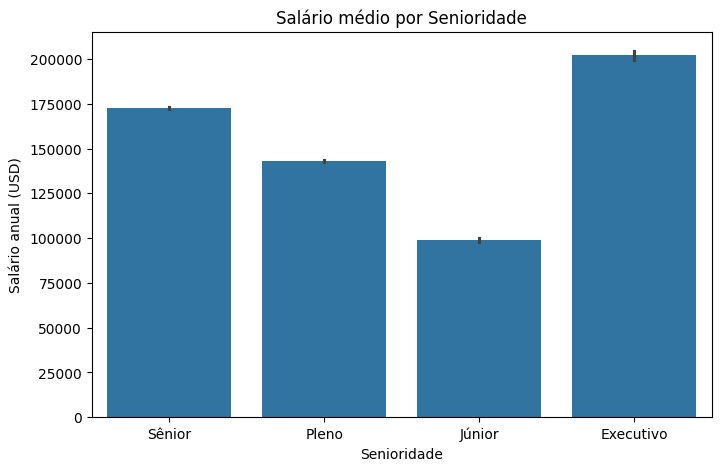

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senoridade', y='salario_em_dolar_americano')
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()

In [81]:
ordem = df_limpo.groupby('senoridade')['salario_em_dolar_americano'].mean().sort_values(ascending=True).index
ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senoridade')

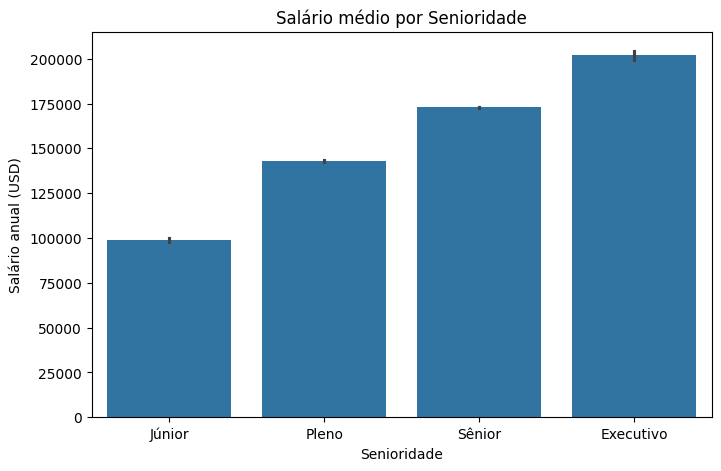

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senoridade', y='salario_em_dolar_americano', order=ordem)
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()

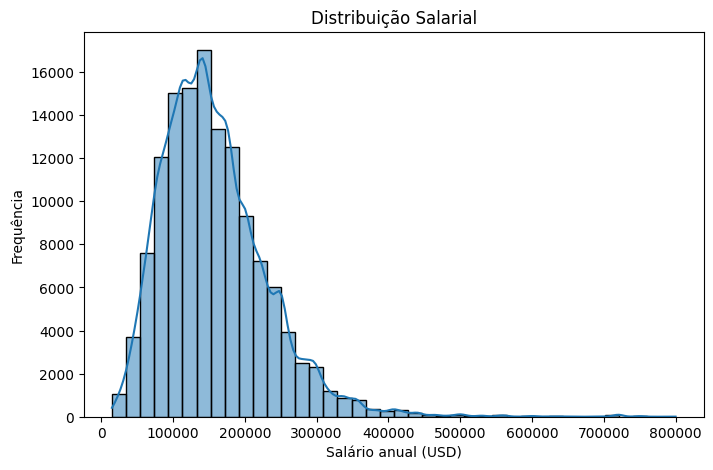

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(df_limpo['salario_em_dolar_americano'], bins=40, kde=True)
plt.title('Distribuição Salarial')
plt.xlabel('Salário anual (USD)')
plt.ylabel('Frequência')
plt.show()

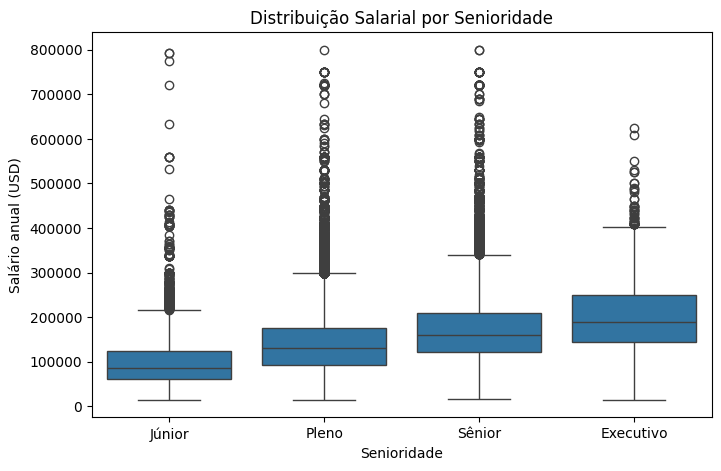

In [84]:
ordem_senoridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senoridade', y='salario_em_dolar_americano', data=df_limpo, order=ordem_senoridade)
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()


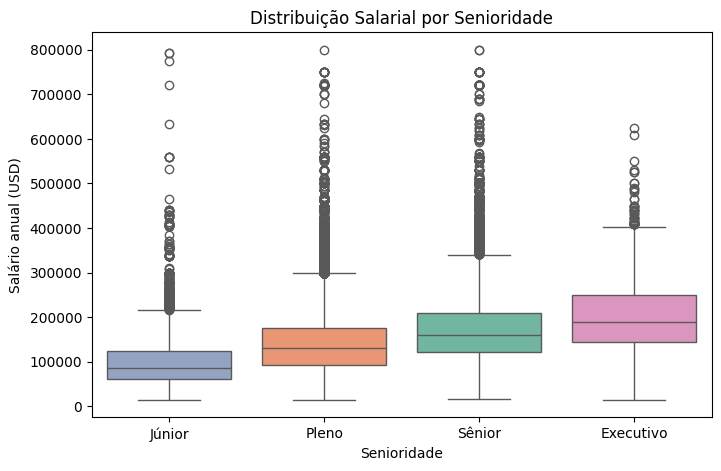

In [85]:
ordem_senoridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senoridade', y='salario_em_dolar_americano', data=df_limpo, order=ordem_senoridade, palette='Set2', hue='senoridade')
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário anual (USD)')
plt.show()

# Gráficos Interativos

In [86]:
import plotly.express as px


In [87]:
df_media_salario_senoridade = df_limpo.groupby('senoridade')['salario_em_dolar_americano'].mean().reset_index()

ordem_senoridade_plot = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

fig = px.bar(df_media_salario_senoridade,
             x='senoridade',
             y='salario_em_dolar_americano',
             title='Salário Médio por Senioridade',
             labels={'senoridade': 'Senioridade', 'salario_em_dolar_americano': 'Salário Anual (USD)'},
             category_orders={'senoridade': ordem_senoridade_plot},
             color='senoridade',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title='Senioridade', yaxis_title='Salário Anual (USD)')
fig.show()

In [88]:
df['percentual_remoto'].unique()
#Aqui uma boa observação, posso transformar esses percentuais de 0,50 e 100
#Para Presencial, hibrido e remoto

array([100,   0,  50])

In [89]:
mapeamento_modalidade = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df_limpo['percentual_remoto'] = df_limpo['percentual_remoto'].replace(mapeamento_modalidade)

df_limpo = df_limpo.rename(columns={'percentual_remoto': 'modalidade'})

print("Coluna 'percentual_remoto' transformada e renomeada para 'modalidade'.")
print(df_limpo['modalidade'].unique())
print(df_limpo.head())

Coluna 'percentual_remoto' transformada e renomeada para 'modalidade'.
['Remoto' 'Presencial' 'Híbrido']
    ano senoridade           periodo                   cargo  salario  \
0  2025     Sênior  Horário integral  Engenheiro de Soluções   214000   
1  2025     Sênior  Horário integral  Engenheiro de Soluções   136000   
2  2025      Pleno  Horário integral     Engenheiro de Dados   158800   
3  2025      Pleno  Horário integral     Engenheiro de Dados   139200   
4  2025     Júnior  Horário integral     Engenheiro de Dados    90000   

  moeda_salario  salario_em_dolar_americano residencia  modalidade  \
0           USD                      214000         US      Remoto   
1           USD                      136000         US      Remoto   
2           USD                      158800         AU  Presencial   
3           USD                      139200         AU  Presencial   
4           USD                       90000         US  Presencial   

  localizacao_empresa tamanho_empre

In [90]:
modalidade_contagem = df_limpo['modalidade'].value_counts().reset_index()
modalidade_contagem.columns = ['modalidade', 'quantidade']

fig = px.pie(modalidade_contagem,
          names='modalidade',
          values='quantidade',
          title= 'Proporção das modalidades de trabalho'
)
fig.show()

In [91]:
modalidade_contagem = df_limpo['modalidade'].value_counts().reset_index()
modalidade_contagem.columns = ['modalidade', 'quantidade']

fig = px.pie(modalidade_contagem,
          names='modalidade',
          values='quantidade',
          title= 'Proporção das modalidades de trabalho',
          hole = 0.5
)
fig.show()

In [92]:
pip install pycountry

In [93]:
import pycountry

def converter_iso2_para_iso3(iso2_code):
    try:
        country = pycountry.countries.get(alpha_2=iso2_code)
        if country:
            return country.alpha_3
        else:
            return iso2_code # Retorna o original se não encontrar
    except KeyError:
        return iso2_code # Retorna o original em caso de erro

# Aplicar a função às colunas 'residencia' e 'localizacao_empresa'
df_limpo['residencia'] = df_limpo['residencia'].apply(converter_iso2_para_iso3)
df_limpo['localizacao_empresa'] = df_limpo['localizacao_empresa'].apply(converter_iso2_para_iso3)

df_limpo.head()

,ano,senoridade,periodo,cargo,salario,moeda_salario,salario_em_dolar_americano,residencia,modalidade,localizacao_empresa,tamanho_empresa
0,2025,Sênior,Horário integral,Engenheiro de Soluções,214000,USD,214000,USA,Remoto,USA,Médio
1,2025,Sênior,Horário integral,Engenheiro de Soluções,136000,USD,136000,USA,Remoto,USA,Médio
2,2025,Pleno,Horário integral,Engenheiro de Dados,158800,USD,158800,AUS,Presencial,AUS,Médio
3,2025,Pleno,Horário integral,Engenheiro de Dados,139200,USD,139200,AUS,Presencial,AUS,Médio
4,2025,Júnior,Horário integral,Engenheiro de Dados,90000,USD,90000,USA,Presencial,USA,Médio


In [94]:
import plotly.express as px

# Filtrar o DataFrame para 'Cientista de Dados'
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Cientista de Dados']

# Calcular o salário médio por localização da empresa
df_salario_medio_pais = df_cientista_dados.groupby('localizacao_empresa')['salario_em_dolar_americano'].mean().reset_index()
df_salario_medio_pais.columns = ['País', 'Salário médio em doláres']

# Criar o mapa mundi interativo
fig = px.choropleth(df_salario_medio_pais,
                    locations='País',
                    color="Salário médio em doláres",
                    hover_name='País',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Salário Médio Anual para Cientistas de Dados por País (USD)')

fig.show()

# Gerando meu csv

In [95]:
df_limpo.to_csv('df_limpo.csv', index=False)
print('DataFrame df_limpo salvo como df_limpo.csv')

DataFrame df_limpo salvo como df_limpo.csv


In [96]:
df_limpo.head()

,ano,senoridade,periodo,cargo,salario,moeda_salario,salario_em_dolar_americano,residencia,modalidade,localizacao_empresa,tamanho_empresa
0,2025,Sênior,Horário integral,Engenheiro de Soluções,214000,USD,214000,USA,Remoto,USA,Médio
1,2025,Sênior,Horário integral,Engenheiro de Soluções,136000,USD,136000,USA,Remoto,USA,Médio
2,2025,Pleno,Horário integral,Engenheiro de Dados,158800,USD,158800,AUS,Presencial,AUS,Médio
3,2025,Pleno,Horário integral,Engenheiro de Dados,139200,USD,139200,AUS,Presencial,AUS,Médio
4,2025,Júnior,Horário integral,Engenheiro de Dados,90000,USD,90000,USA,Presencial,USA,Médio
